<a href="https://colab.research.google.com/github/jjsa99/FAA_FinalProject/blob/main/transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we present:

- An overview of the 

In [ ]:
def get_ImageData(dir_path = "data/data/", image_size = (150, 150), batch_size = 32, validation_split = 0.2, color_mode = 'grayscale', label_mode = 'categorical'):

  if validation_split == None:
    subset = [None, None]
  else:
    subset = ["training", "validation"]
  
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = dir_path + "train",  
                                                                labels="inferred",
                                                                label_mode=label_mode,
                                                                class_names= ["normal", "covid", "pneumonia"],
                                                                color_mode=color_mode,
                                                                batch_size=batch_size,
                                                                image_size=image_size,
                                                                shuffle=True,
                                                                seed=42,
                                                                validation_split=validation_split,
                                                                subset=subset[0],
                                                                interpolation="bilinear",
                                                                follow_links=False,
                                                                crop_to_aspect_ratio=False,
                                                                )
  
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=dir_path + "train",                                                      
                                                              labels="inferred",
                                                              label_mode=label_mode,
                                                              class_names=["normal", "covid", "pneumonia"],
                                                              color_mode=color_mode,
                                                              batch_size=batch_size,
                                                              image_size=image_size,
                                                              shuffle=True,
                                                              seed=42,
                                                              validation_split=validation_split,
                                                              subset=subset[1],
                                                              interpolation="bilinear",
                                                              follow_links=False,
                                                              crop_to_aspect_ratio=False,
                                                              )

  test_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = dir_path + "test",                                                      
                                                                labels="inferred",
                                                                label_mode=label_mode,
                                                                class_names=["normal", "covid", "pneumonia"],
                                                                color_mode=color_mode,
                                                                batch_size=batch_size,
                                                                image_size=image_size,
                                                                shuffle=True,
                                                                seed=42,
                                                                validation_split=None,
                                                                subset=None,
                                                                interpolation="bilinear",
                                                                follow_links=False,
                                                                crop_to_aspect_ratio=False,
                                                                )

  
  return train_ds, val_ds, test_ds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install numpy Cython
!pip install mrmr_selection
#!pip install -U pymrmr
#!pip install umap-learn
#!python -m pip install python-dotenv
#!pip install tbb
#!pip install hdbscan

     |████████████████████████████████| 82 kB 318 kB/s 


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import os


# Sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from io import BytesIO

#opencv
import cv2 as cv

from mrmr import mrmr_classif

#keras/Tensor
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import keras.backend as K
K.set_image_data_format('channels_last')
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (5,5)

from sklearn.cluster import *
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.feature_extraction import  *
from sklearn.base import *
from sklearn.model_selection import *


# Aqui cada um põe o caminho na sua drive:
#%cd "/content/drive/MyDrive/FAA - Project 2/Colab Notebooks/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/"
%cd /content/drive/MyDrive/UA/5º Ano/Fundamentos de Aprendizagem Automática/Projetos/Mini-projeto2/FAA - Project 2

/content/drive/.shortcut-targets-by-id/1UrAYX6NtXl4Weejnw_I3gBu2j9OjTlLK/FAA - Project 2


In [ ]:
dir_path = "data/data/"
image_size = (150, 150)
batch_size = 32
validation_split = 0.1
color_mode = "rgb"
label_mode = 'int'

train_ds, val_ds, test_ds = get_ImageData(dir_path = dir_path, image_size = image_size, batch_size = batch_size, validation_split = validation_split, color_mode = color_mode, label_mode = label_mode)

Found 4275 files belonging to 3 classes.
Using 3848 files for training.
Found 4275 files belonging to 3 classes.
Using 427 files for validation.
Found 300 files belonging to 3 classes.


#### Data overview

In [ ]:
# To access the first batch of the dataset and the associated labels:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch)
  break

# To access the first image of the first batch and the associated label:
for image_batch, labels_batch in train_ds:
  print(image_batch[0].shape)
  print(labels_batch[0])
  break

# If there were no batches: to access the first image of the dataset and the associated label:
for image, labels in train_ds.unbatch():
  print(image.shape)
  print(labels)
  break

(32, 150, 150, 3)
tf.Tensor([1 1 1 1 0 0 1 2 2 0 1 1 1 1 1 2 0 2 1 2 0 0 1 2 1 1 0 1 1 2 1 1], shape=(32,), dtype=int32)
(150, 150, 3)
tf.Tensor(1, shape=(), dtype=int32)
(150, 150, 3)
tf.Tensor(2, shape=(), dtype=int32)


['normal', 'covid', 'pneumonia']


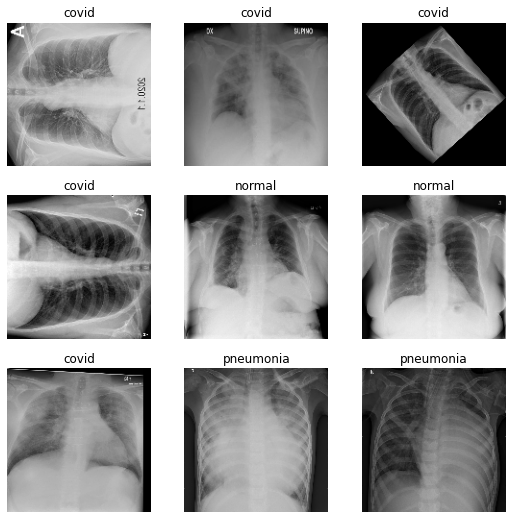

In [ ]:
class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

[Text(0, 0, 'normal'), Text(0, 0, 'covid'), Text(0, 0, 'pneumonia')]

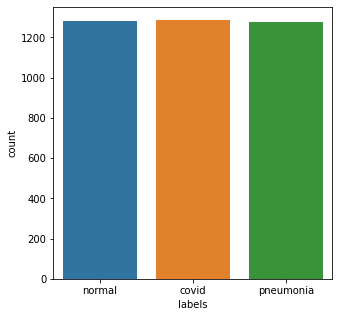

In [ ]:
class_names = train_ds.class_names
labels = np.concatenate([y for x, y in train_ds], axis=0)
df = pd.DataFrame(labels, columns=["labels"])
sns.countplot(data = df, x = "labels").set_xticklabels(class_names)

In [ ]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_ds))
print('Number of training examples: %d' % (tf.data.experimental.cardinality(train_ds)*batch_size))
print('\nNumber of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of validation examples: %d' % (tf.data.experimental.cardinality(val_ds)*batch_size))
print('\nNumber of test batches: %d' % tf.data.experimental.cardinality(test_ds))
print('Number of test examples: %d' % (tf.data.experimental.cardinality(test_ds)*batch_size))

Number of training batches: 121
Number of training examples: 3872

Number of validation batches: 14
Number of validation examples: 448

Number of test batches: 10
Number of test examples: 320


Configure the dataset for performance

In [ ]:
# Use buffered prefetching to load images from disk without having I/O become blocking.
# During training of the model, the next batch will be fetched while the model is training the current batch, improving performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

Data Augmentation (incompleto)

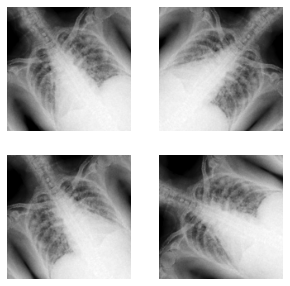

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(5, 5))
  first_image = image[0]
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

#### Transfer learning - Feature Extraction + One layer NN

In [ ]:
# Mobie net 2 expects images with pixels [-1, 1]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
image_shape = image_size + (3,)
#image_shape = (160, 160, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(image_batch.shape)
print(feature_batch.shape)

(32, 150, 150, 3)
(32, 5, 5, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(3, activation = 'softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [ ]:
inputs = tf.keras.Input(shape=image_shape)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)


(32, 75)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
display(model.summary())
display(len(model.trainable_variables)) # as variáveis que são treináveis são os pesos e os biases

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, None)  0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 150, 150, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 150, 150, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

None

2

In [ ]:
#train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
#val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.85
initial accuracy: 0.29


In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
121/121 [==============================] - 145s 1s/step - loss: 1.2161 - accuracy: 0.4288 - val_loss: 0.9808 - val_accuracy: 0.5433
Epoch 2/10
121/121 [==============================] - 142s 1s/step - loss: 0.7023 - accuracy: 0.7074 - val_loss: 0.7487 - val_accuracy: 0.6956
Epoch 3/10
121/121 [==============================] - 145s 1s/step - loss: 0.5740 - accuracy: 0.7916 - val_loss: 0.6689 - val_accuracy: 0.7260
Epoch 4/10
121/121 [==============================] - 143s 1s/step - loss: 0.5066 - accuracy: 0.8212 - val_loss: 0.6134 - val_accuracy: 0.7611
Epoch 5/10
121/121 [==============================] - 145s 1s/step - loss: 0.4654 - accuracy: 0.8381 - val_loss: 0.5805 - val_accuracy: 0.7752
Epoch 6/10
121/121 [==============================] - 144s 1s/step - loss: 0.4409 - accuracy: 0.8394 - val_loss: 0.5572 - val_accuracy: 0.7892
Epoch 7/10
121/121 [==============================] - 148s 1s/step - loss: 0.4264 - accuracy: 0.8571 - val_loss: 0.5467 - val_accuracy: 0.7939

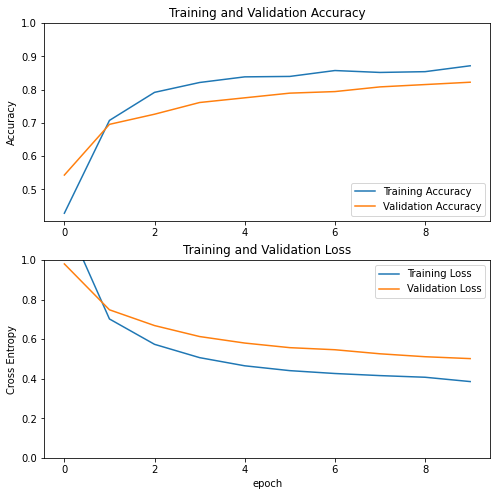

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Transfer learning - Feature Extraction

In [ ]:
def feature_extraction(preprocess_input, base_model, model_name, data, image_shape, labels, save_to_file, layers = []):
  
  base_model.trainable = False

  inputs = tf.keras.Input(shape=image_shape)
  x = preprocess_input(inputs)
  x = base_model(x, training=False)
  for layer in layers:
    x = layer(x)
  model = tf.keras.Model(inputs, x)

  features = model.predict(data)
  
  new_shape = 1
  for shape in features.shape[1:]:
    new_shape = new_shape*shape
  features = features.reshape((features.shape[0], new_shape))
  
  features_labels = np.hstack((features, labels.reshape((labels.shape[0],1))))
  df = pd.DataFrame(features_labels)
  df = df.set_axis([*df.columns[:-1], 'Labels'], axis=1)
  df['Labels'] = df['Labels'].apply(lambda x: train_ds.class_names[int(x)])

  if save_to_file:
    df.to_csv("features/" + model_name + ".csv", index=False)
  
  return df

In [ ]:
dir_path = "data/data/"
image_size = (224, 224)
batch_size = 32
validation_split = None
color_mode = "rgb"
label_mode = 'int'

train_ds, val_ds, test_ds = get_ImageData(dir_path = dir_path, image_size = image_size, batch_size = batch_size, validation_split = validation_split, color_mode = color_mode, label_mode = label_mode)

Found 4275 files belonging to 3 classes.
Found 4275 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [ ]:
labels_train = np.concatenate([y for x, y in train_ds], axis=0)
labels_test  = np.concatenate([y for x, y in test_ds], axis=0)

KeyboardInterrupt: ignored

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
image_shape = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape, include_top=False, weights='imagenet')
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape, include_top=True, weights='imagenet')
#layers = [tf.keras.layers.GlobalAveragePooling2D()]
layers = []

#outputs = [layer.output for layer in base_model.layers]
#outputs

model_name = "MobileNetV2_train_with_top"
features_train = feature_extraction(preprocess_input, base_model, model_name, train_ds, image_shape, labels_train, save_to_file = 1, layers = layers)
#model_name = "MobileNetV2_test_with_top"
#features_test = feature_extraction(preprocess_input, base_model, model_name, test_ds, image_shape, labels_test, save_to_file = 1, layers = layers)

In [ ]:
#model_name = "MobileNetV2_train"
model_name = "MobileNetV2_train_with_top"
features_train = pd.read_csv("features/" + model_name + ".csv")
model_name = "MobileNetV2_test"
features_test = pd.read_csv("features/" + model_name + ".csv")

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
image_shape = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape, include_top=False, weights='imagenet')
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape, include_top=True, weights='imagenet')
#layers = [tf.keras.layers.GlobalAveragePooling2D()]
layers = []

#outputs = [layer.output for layer in base_model.layers]
#outputs

model_name = "MobileNetV2_train_with_top"
features_train = feature_extraction(preprocess_input, base_model, model_name, train_ds, image_shape, labels_train, save_to_file = 1, layers = layers)
#model_name = "MobileNetV2_test_with_top"
#features_test = feature_extraction(preprocess_input, base_model, model_name, test_ds, image_shape, labels_test, save_to_file = 1, layers = layers)

In [ ]:
features_train.head()

In [ ]:
base_model.summary()

Dimensionality Reduction

###### UMAP

In [ ]:
# Pre-processing
features_train_scaled = StandardScaler().fit_transform(features_train.iloc[:,0:-1])

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(features_train_scaled)
embedding.shape

(4275, 2)

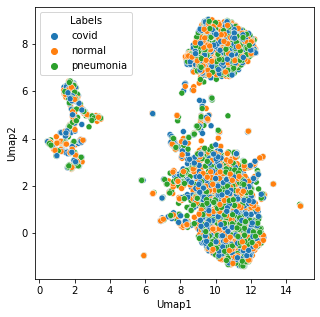

In [ ]:
df_umap = pd.DataFrame(embedding, columns = ["Umap1", "Umap2"]).join(features_train.iloc[:,-1:], how='inner')
sns.scatterplot(data=df_umap, x="Umap1", y="Umap2", hue="Labels")

##### PCA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Pre-processing
features_train_scaled = StandardScaler().fit_transform(features_train.iloc[:,0:-1])

# PCA
accepted_variance = [0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99]
for a_c in accepted_variance:
  #pca = PCA(n_components=a_c).fit(features_train_scaled)
  lda = LinearDiscriminantAnalysis(n_components=2).fit(features_train_scaled, labels)
  print("Accepted Variance: ", a_c, "\t Nº of PCA components: ", lda.n_components_)

AttributeError: ignored

In [ ]:
#pca = PCA(n_components=0.9).fit(features_train_scaled)
#features_train_scaled_pca = pca.transform(features_train_scaled)

features_train_scaled_pca = LinearDiscriminantAnalysis(n_components=2).fit_transform(features_train_scaled, labels)

In [ ]:
features_train.shape

(4275, 1281)

##### LDA

In [ ]:
lda_scaled = StandardScaler().fit_transform(features_train.iloc[:,0:-1])
lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(lda_scaled, features_train["Labels"])
features_train[["LDA1", "LDA2"]] = lda

### Models

In [ ]:
def show_confusion_matrix(model, X, y, classes):
  
  # Get predictions with cross-validation
  y_pred = cross_val_predict(model, X, y)
  y_true = y

  # Confusion matrix
  fig, ax = plt.subplots(figsize=(5,5))
  conf_mat = confusion_matrix(y_true, y_pred, labels = classes)
  sns.heatmap(conf_mat, annot = True, fmt = 'd', xticklabels = classes, yticklabels = classes)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  # Classification report
  print(classification_report(y_true, y_pred, target_names=classes))

  return y_pred

def train_model(X, y, model, param_grid, cv, display_confusion_matrix, scoring = "accuracy", classes = []):
  
  # Search for best parameters
  model_grid = GridSearchCV(model, param_grid, cv = cv, scoring = scoring)   
  model_grid.fit(X, y)

  # Print best parameters
  print("Best cross-validation score: {:.4f}".format(model_grid.best_score_))
  print("Best parameters:\n{}".format(model_grid.best_params_))

  if display_confusion_matrix:
    y_pred = show_confusion_matrix(model_grid, X, y, classes)

  return model_grid


def test_models(log_reg_flag, param_grid_log_reg, svm_flag, param_grid_svm, qda_flag, param_grid_qda, lda_flag, param_grid_lda, kmeans_flag, param_grid_kmeans, X, y,
                cv, scoring, classes, display_confusion_matrix):
  
  models = {}

  if log_reg_flag:
    log_reg = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear'))    
    log_reg = train_model(X, y, log_reg, param_grid_log_reg, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)
    models['log_reg'] = log_reg

  if svm_flag:
    svm = make_pipeline(MinMaxScaler(), SVC()) 
    svm = train_model(X, y, svm, param_grid_svm, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)
    models['svm'] = svm

  if qda_flag:
    qda = make_pipeline(QuadraticDiscriminantAnalysis())
    qda = train_model(X, y, qda, param_grid_qda, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)
    models['qda'] = qda

  if lda_flag:
    lda = make_pipeline(LinearDiscriminantAnalysis())
    lda = train_model(X, y, lda, param_grid_lda, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)
    models['lda'] = lda

  if kmeans_flag:
    kmeans = make_pipeline(Normalizer(), KNeighborsClassifier())
    kmeans = train_model(X, y, kmeans, param_grid_kmeans, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)
    models['kmeans'] = kmeans

  return models  


def get_df_classes(df, labels, classes):
  return  df[df[labels].isin(classes)].reset_index()

In [ ]:
model_names_train = ["MobileNetV2_train_with_top_224", "VGG16_train_with_top_224", "VGG19_train_with_top_224", "DenseNet121_train_with_top_224", "ResNet50V2_train_with_top_224"]
model_names_test  = ["MobileNetV2_test_with_top_224", "VGG16_test_with_top_224", "VGG19_test_with_top_224", "DenseNet121_test_with_top_224", "ResNet50V2_test_with_top_224"]

#model_names_train = ["MobileNetV2_train_160", "VGG16_train_160", "VGG19_train_160", "DenseNet121_train_160", "ResNet50V2_train_160"]
#model_names_test  = ["MobileNetV2_test_160", "VGG16_test_160", "VGG19_test_160", "DenseNet121_test_160", "ResNet50V2_test_160"]

dfs_train = []
dfs_test = []
for model_name in model_names_train:
  df = pd.read_csv("features/" + model_name + ".csv")
  labels_train = df.pop("Labels")
  dfs_train.append(df)
  
for model_name in model_names_test:
  df = pd.read_csv("features/" + model_name + ".csv")
  labels_test = df.pop("Labels")
  dfs_test.append(df)
  
features_train = pd.concat(dfs_train, axis=1, ignore_index=True)
features_train["Labels"] = labels_train
features_test = pd.concat(dfs_test, axis=1, ignore_index=True)
features_test["Labels"] = labels_test

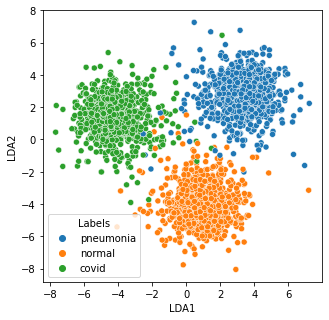

In [ ]:
#lda_scaled = StandardScaler().fit_transform(X)
#lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(lda_scaled, y)


y_np = np.asarray(y)
y_np = y_np.reshape([y_np.shape[0], 1])
h = np.hstack([lda, y_np])
df = pd.DataFrame(h, columns = ["LDA1", "LDA2", "Labels"])

sns.scatterplot(data=df, x="LDA1", y="LDA2", hue="Labels")

#pos=(y==1)
#neg=(y==0)
#plt.scatter(lda[pos[:,0],0],lda[pos[:,0],1],c="r",marker="+")
#plt.scatter(lda[neg[:,0],0],lda[neg[:,0],1],c="b",marker="o")

In [ ]:
#classes = ["normal", "pneumonia"]
classes = ["normal", "covid", "pneumonia"]

X = get_df_classes(features_train, "Labels", classes)
y = X["Labels"]
X = X.drop("Labels", axis = 1)

#scaler = StandardScaler().fit(X)
#X_scaled = pd.DataFrame(scaler.transform(X))
#lda = LinearDiscriminantAnalysis(n_components=2).fit(X_scaled, y)
#X[["LDA1", "LDA2"]] = lda.transform(X_scaled)

selected_features = mrmr_classif(X=X, y=y, K=1000)

X = X[selected_features]

scoring = "accuracy"
n_cv = 5

100%|██████████| 1000/1000 [36:05<00:00,  2.17s/it]


In [ ]:
log_reg_flag = 1
param_grid_log_reg = {'logisticregression__C': [0.001, 0.01, 1, 10, 100], 
                      #'logisticregression__C': [1], 
                      'logisticregression__penalty': ["l1", 'l2']}

svm_flag = 1
param_grid_svm = {'svc__C': [0.1, 1, 10],
                  #'svc__gamma': [0.1, 0.5, 1],
                  'svc__gamma' : ["auto"],
                  'svc__kernel': ["rbf", "linear", "sigmoid"]}

qda_flag = 1
param_grid_qda = {'quadraticdiscriminantanalysis__reg_param': [0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3]}


lda_flag = 1
param_grid_lda = {'lineardiscriminantanalysis__tol': [None, 10**-12, 10**-10], #[None, 10**-12, 10**-10, 10**-8, 10**-6, 10**-5],
                  'lineardiscriminantanalysis__shrinkage': [None, "auto"],
                  'lineardiscriminantanalysis__solver': ["svd", "lsqr"]}

kmeans_flag = 1
param_grid_kmeans = {'kneighborsclassifier__n_neighbors': range(3, 13, 1), # range(3, 15, 1),
                     'kneighborsclassifier__weights': ["uniform", "distance"]}


models = test_models(log_reg_flag, param_grid_log_reg, svm_flag, param_grid_svm, qda_flag, param_grid_qda, lda_flag, param_grid_lda, kmeans_flag, param_grid_kmeans, X, y,
                     cv = n_cv, scoring = scoring, classes = classes, display_confusion_matrix = 0)

Best cross-validation score: 0.4267
Best parameters:
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'}
Best cross-validation score: 0.4143
Best parameters:
{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'linear'}
Best cross-validation score: 0.3457
Best parameters:
{'quadraticdiscriminantanalysis__reg_param': 0.6}
Best cross-validation score: 0.4250
Best parameters:
{'lineardiscriminantanalysis__shrinkage': 'auto', 'lineardiscriminantanalysis__solver': 'lsqr', 'lineardiscriminantanalysis__tol': None}
Best cross-validation score: 0.3518
Best parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__weights': 'distance'}


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Numer of Features')]

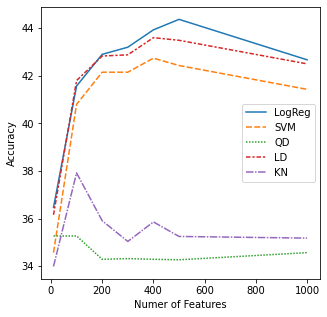

In [ ]:
acc = [[36.47, 34.57, 35.27, 36.16, 33.99, 10],
       [41.57, 40.80,35.27,41.80,37.92, 100],
       [42.90,42.15,34.29,42.83,35.91, 200],
       [43.20,42.15,34.32,42.88,35.04, 300],
       [43.93,42.74,34.29,43.60,35.86, 400],
       [44.37,42.43,34.27,43.49,35.25, 500],
       [42.67,41.43,34.57,42.5,35.18, 1000]]

#acc = [[36.47,41.57,42.90,43.20,43.93,44.37],
       #[34.57,40.80,42.15,42.15,42.74,42.43],
       #[35.27,35.27,34.29,34.32,34.29,34.27],
       #[36.16,41.80,42.83,42.88,43.60,43.49],
       #[33.99,37.92,35.91,35.04,35.86,35.25],
#       [10, 100, 200, 300, 400, 500]]


acc = pd.DataFrame(data = acc, columns = ["LogReg", "SVM", "QD", "LD", "KN", "nFeatures"])
acc = acc.set_index("nFeatures")
#display(acc)
ax = sns.lineplot(data = acc)
ax.set(xlabel = 'Numer of Features', ylabel = 'Accuracy')  

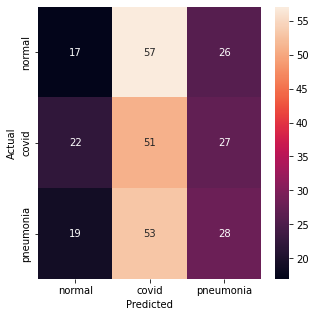

              precision    recall  f1-score   support

      normal       0.32      0.51      0.39       100
       covid       0.29      0.17      0.22       100
   pneumonia       0.35      0.28      0.31       100

    accuracy                           0.32       300
   macro avg       0.32      0.32      0.31       300
weighted avg       0.32      0.32      0.31       300



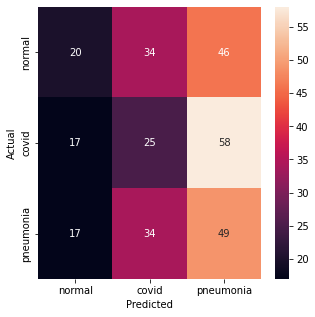

              precision    recall  f1-score   support

      normal       0.27      0.25      0.26       100
       covid       0.37      0.20      0.26       100
   pneumonia       0.32      0.49      0.39       100

    accuracy                           0.31       300
   macro avg       0.32      0.31      0.30       300
weighted avg       0.32      0.31      0.30       300



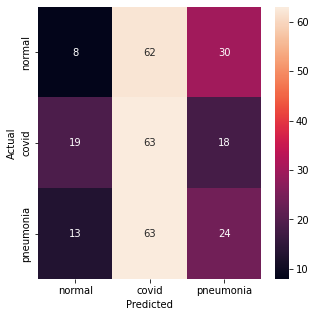

              precision    recall  f1-score   support

      normal       0.34      0.63      0.44       100
       covid       0.20      0.08      0.11       100
   pneumonia       0.33      0.24      0.28       100

    accuracy                           0.32       300
   macro avg       0.29      0.32      0.28       300
weighted avg       0.29      0.32      0.28       300



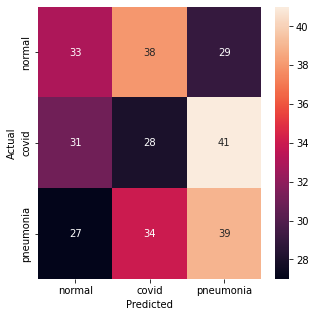

              precision    recall  f1-score   support

      normal       0.28      0.28      0.28       100
       covid       0.36      0.33      0.35       100
   pneumonia       0.36      0.39      0.37       100

    accuracy                           0.33       300
   macro avg       0.33      0.33      0.33       300
weighted avg       0.33      0.33      0.33       300



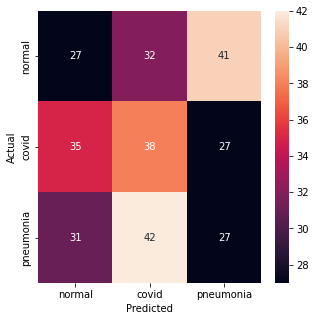

              precision    recall  f1-score   support

      normal       0.34      0.38      0.36       100
       covid       0.29      0.27      0.28       100
   pneumonia       0.28      0.27      0.28       100

    accuracy                           0.31       300
   macro avg       0.30      0.31      0.31       300
weighted avg       0.30      0.31      0.31       300



In [ ]:
classes = ["normal", "covid", "pneumonia"]

X_test = get_df_classes(features_test, "Labels", classes)
y_test = X_test["Labels"]
X_test = X_test.drop("Labels", axis = 1)

X_test_scaled = scaler.transform(X_test)
X_test[["LDA1", "LDA2"]] = lda.transform(X_test_scaled)
X_test = X_test[selected_features]

for model in models.values():
  show_confusion_matrix(model, X_test, y_test, classes)


In [ ]:
final_estimator = make_pipeline(StandardScaler(), LogisticRegression())
eclf_stack = StackingClassifier(estimators = list(models.items()),
                                final_estimator = final_estimator)

# Search best parameters for classifier
param_grid = {'final_estimator__logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'final_estimator__logisticregression__penalty': ['l2', 'none']}

# Train the model for each coefficient using cross validation - Accuracy Curve
eclf_stack_grid_acc = GridSearchCV(eclf_stack, param_grid, cv = 5, scoring = 'accuracy')   
eclf_stack_grid_acc.fit(X, y)

print("Best cross-validation score: {:.4f}".format(eclf_stack_grid_acc.best_score_))
print("Best parameters:\n{}".format(eclf_stack_grid_acc.best_params_))

#### LIXO

In [ ]:
# Train the model for each coefficient using cross validation - accuracy
svm_grid_acc = GridSearchCV(svm, param_grid_svm, cv = 5, scoring = 'accuracy')   
svm_grid_acc.fit(features_train[selected_features], features_train["Labels"])

# Best validation score and parameters - accuracy
print("Best cross-validation score: {:.2f}".format(svm_grid_acc.best_score_))
print("Best parameters:\n{}".format(svm_grid_acc.best_params_))

# Train the model for each coefficient using cross validation - Accuracy Curve

log_reg_grid_acc = GridSearchCV(log_reg, param_grid, cv = 5, scoring = 'accuracy')   
log_reg_grid_acc.fit(features_train[selected_features], features_train["Labels"])

# Best validation score and parameters - ROC Curve
print("Best cross-validation score: {:.2f}".format(log_reg_grid_acc.best_score_))
print("Best parameters:\n{}".format(log_reg_grid_acc.best_params_))

#display_heatmap(param_grid, log_reg_grid_acc, square = True)

Best cross-validation score: 0.38
Best parameters:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}


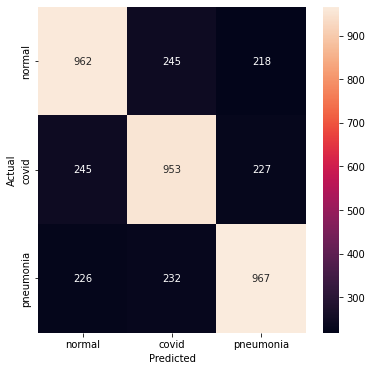

              precision    recall  f1-score   support

      normal       0.67      0.67      0.67      1425
       covid       0.67      0.68      0.67      1425
   pneumonia       0.68      0.68      0.68      1425

    accuracy                           0.67      4275
   macro avg       0.67      0.67      0.67      4275
weighted avg       0.67      0.67      0.67      4275



In [ ]:
log_reg_model = Pipeline([("scaler", StandardScaler()),
                          ("log_reg", LogisticRegression(C = 0.1, penalty = 'l2', solver = "liblinear" ))])

y_pred = cross_val_predict(log_reg_model, features_train[["LDA1", "LDA2"]], features_train["Labels"])

y_test = features_train["Labels"]
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred, labels = ["normal", "covid", "pneumonia"])
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=["normal", "covid", "pneumonia"], yticklabels=["normal", "covid", "pneumonia"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred, target_names=["normal", "covid", "pneumonia"]))

In [ ]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear'))    
param_grid_log_reg = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                      'logisticregression__penalty': ['l2', 'l1']}

log_reg = train_model(X, y, log_reg, param_grid_log_reg, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)

Best cross-validation score: 0.38
Best parameters:
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}


In [ ]:
svm = make_pipeline(MinMaxScaler(), SVC()) 
param_grid_svm = {'svc__C': [0.1, 10, 100, 1000],
                  #'svc__gamma': [0.001, 0.1, 1, 10, 100, 1000],
                  'svc__gamma' : ["auto"],
                  'svc__kernel': ["rbf", "linear", "sigmoid"]}

svm = train_model(X, y, svm, param_grid_svm, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)

In [ ]:
qda = make_pipeline(QuadraticDiscriminantAnalysis())
param_grid_qda = {'quadraticdiscriminantanalysis__reg_param': [0.1, 0.4, 0.6, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4]}

qda = train_model(X, y, qda, param_grid_qda, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)

Best cross-validation score: 0.35
Best parameters:
{'quadraticdiscriminantanalysis__reg_param': 1.2}


In [ ]:
lda = make_pipeline(LinearDiscriminantAnalysis())
param_grid_lda = {'lineardiscriminantanalysis__tol': [None, 10**-12, 10**-10, 10**-8, 10**-6, 10**-5],
                  'lineardiscriminantanalysis__shrinkage': [None, "auto"],
                  'lineardiscriminantanalysis__solver': ["svd", "lsqr"]}

lda = train_model(X, y, lda, param_grid_lda, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)

Best cross-validation score: 0.38
Best parameters:
{'lineardiscriminantanalysis__shrinkage': None, 'lineardiscriminantanalysis__solver': 'svd', 'lineardiscriminantanalysis__tol': 1e-14}


In [ ]:
kmeans = make_pipeline(Normalizer(), KNeighborsClassifier())
param_grid_kmeans = {'kneighborsclassifier__n_neighbors': range(3, 15, 1),
                     'kneighborsclassifier__weights': ["uniform", "distance"]}

kmeans = train_model(X, y, kmeans, param_grid_kmeans, cv = n_cv, display_confusion_matrix = 0, scoring = scoring, classes = classes)

Best cross-validation score: 0.36
Best parameters:
{'kneighborsclassifier__n_neighbors': 12, 'kneighborsclassifier__weights': 'distance'}
